# CMSE202-Project1

In [9]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline

MyAppToken = 'rEPOXGSegb5AUSutACzeimRkD'
client = Socrata("data.cityofchicago.org", MyAppToken)

results = client.get("ijzp-q8t2", limit=100)

df = pd.DataFrame.from_records(results)

In [10]:
data = df.drop(columns=[':@computed_region_43wa_7qmu', ':@computed_region_6mkv_f3dw',
       ':@computed_region_awaf_s7ux', ':@computed_region_bdys_3d7i',
       ':@computed_region_d3ds_rm58', ':@computed_region_d9mm_jgwp',
       ':@computed_region_rpca_8um6', ':@computed_region_vrxf_vc4k'])

data.head()

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,False,2424,074XX N WINCHESTER AVE,JD198885,1,2020-03-30T23:55:00.000,FINANCIAL IDENTITY THEFT OVER $ 300,024,False,11,...,42.017111558,"{'latitude': '42.017111558', 'longitude': '-87...",NaN,-87.679058479,DECEPTIVE PRACTICE,2020-04-06T15:47:29.000,49,1162043,1949505,2020
1,False,0323,071XX S RHODES AVE,JD198637,69,2020-03-30T23:45:00.000,ARMED - HANDGUN,003,False,03,...,41.76477814,"{'latitude': '41.76477814', 'longitude': '-87....",SIDEWALK,-87.611613678,ROBBERY,2020-04-06T15:47:29.000,6,1181144,1857702,2020
2,True,0411,011XX E 81ST ST,JD198648,45,2020-03-30T23:33:00.000,UNLAWFUL USE - HANDGUN,004,False,15,...,41.74771987,"{'latitude': '41.74771987', 'longitude': '-87....",ALLEY,-87.596956093,WEAPONS VIOLATION,2020-04-06T15:47:29.000,8,1185196,1851520,2020
3,False,1234,022XX W 21ST ST,JD198629,31,2020-03-30T23:32:00.000,UNLAWFUL USE - HANDGUN,012,False,15,...,41.853905005,"{'latitude': '41.853905005', 'longitude': '-87...",RESIDENCE - YARD (FRONT / BACK),-87.682031225,WEAPONS VIOLATION,2020-04-06T15:47:29.000,25,1161687,1890026,2020
4,False,0111,001XX N STATE ST,JD198626,32,2020-03-30T23:30:00.000,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,001,False,04A,...,41.884268748,"{'latitude': '41.884268748', 'longitude': '-87...",SIDEWALK,-87.627904966,ASSAULT,2020-04-06T15:47:29.000,42,1176342,1901207,2020


In [2]:
## this part is data analyze 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data =  pd.read_csv("crimes_2015_2020.csv" , na_values = [None, 'NaN','Nothing'], header = 0) # the data is the 2015 data to 2020 
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10179775,HY368117,01/01/2015 12:00:00 AM,022XX S SAWYER AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,12.0,30.0,02,1155042.0,1888945.0,2015,04/04/2020 03:44:34 PM,41.851074,-87.70645,"(41.851074338, -87.706449961)"
1,11768614,JC361321,01/01/2015 12:00:00 AM,030XX W 41ST ST,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,12.0,58.0,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
2,11752913,JC342515,01/01/2015 12:00:00 AM,030XX W 41ST ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,12.0,58.0,17,NaN,NaN,2015,03/23/2020 03:47:32 PM,NaN,NaN,NaN
3,11993485,JD166700,01/01/2015 12:00:00 AM,095XX S BENNETT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,7.0,51.0,11,NaN,NaN,2015,02/28/2020 03:48:46 PM,NaN,NaN,NaN
4,11269813,JB195608,01/01/2015 12:00:00 AM,029XX N LOWELL AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,31.0,20.0,02,NaN,NaN,2015,02/25/2020 03:47:28 PM,NaN,NaN,NaN


In [8]:
data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [9]:
data.drop_duplicates(subset = ['Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True,)

In [10]:
data.Date = pd.to_datetime(data.Date, format = '%m/%d/%Y %I:%M:%S %p')
data.index = pd.DatetimeIndex(data.Date)


In [11]:
data['Primary Type'] = pd.Categorical(data['Primary Type'])
data['Description'] = pd.Categorical(data['Description'])
data['Location Description'] = pd.Categorical(data['Location Description'])

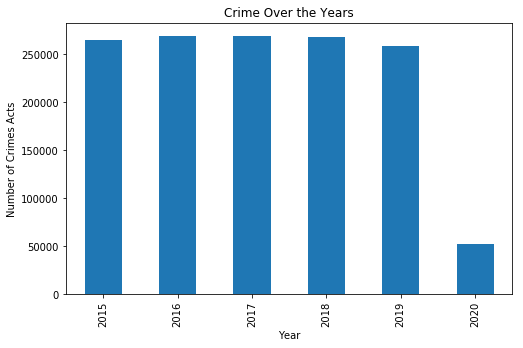

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [12]:
plt.figure(figsize = (8,5))
data.groupby([data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))

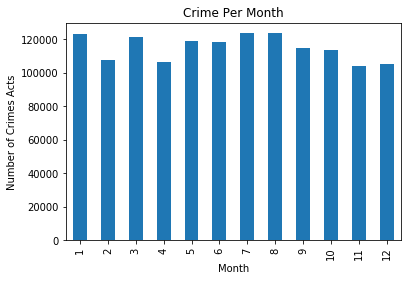

In [13]:
data.groupby([data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()

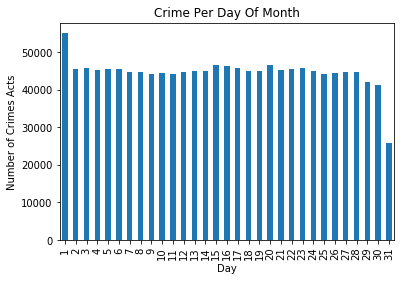

In [14]:
data.groupby([data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

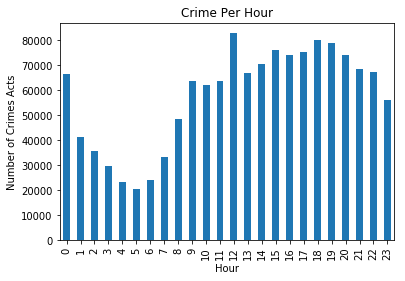

In [15]:
data.groupby([data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [16]:
Crime_Data_date = data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = data.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)

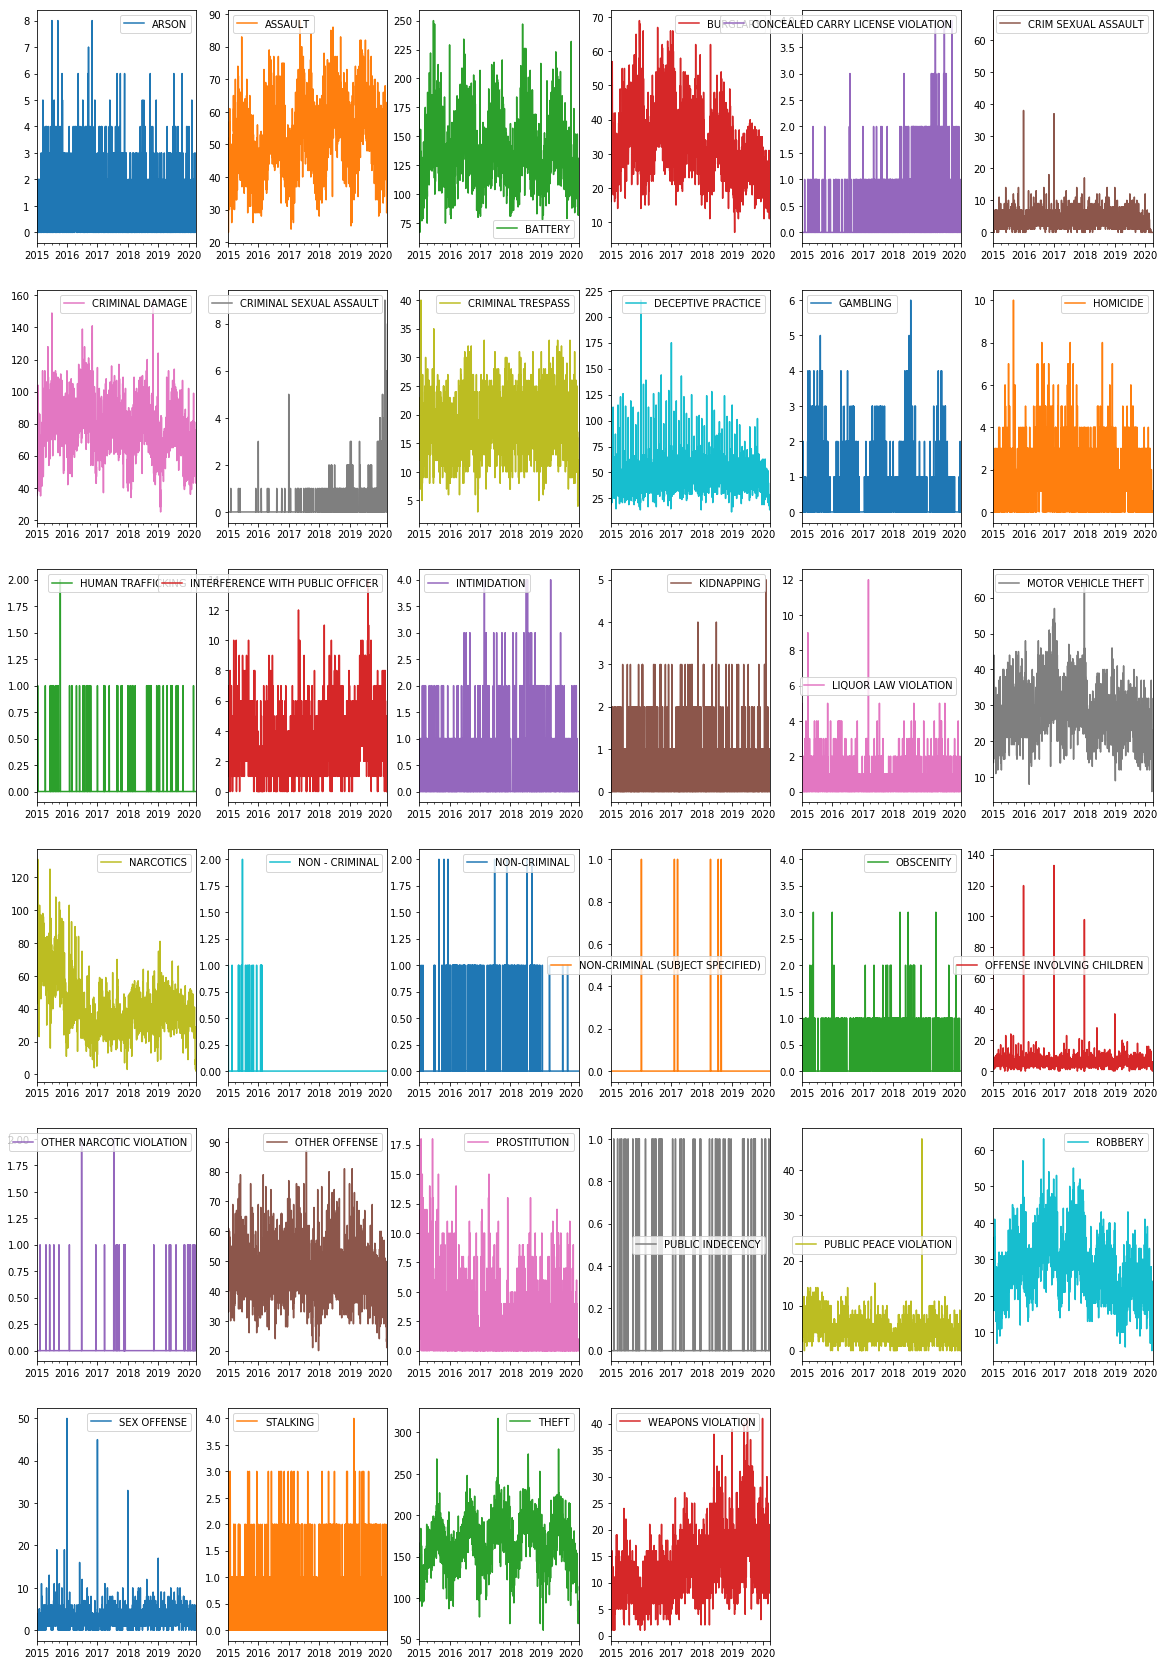

In [18]:
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

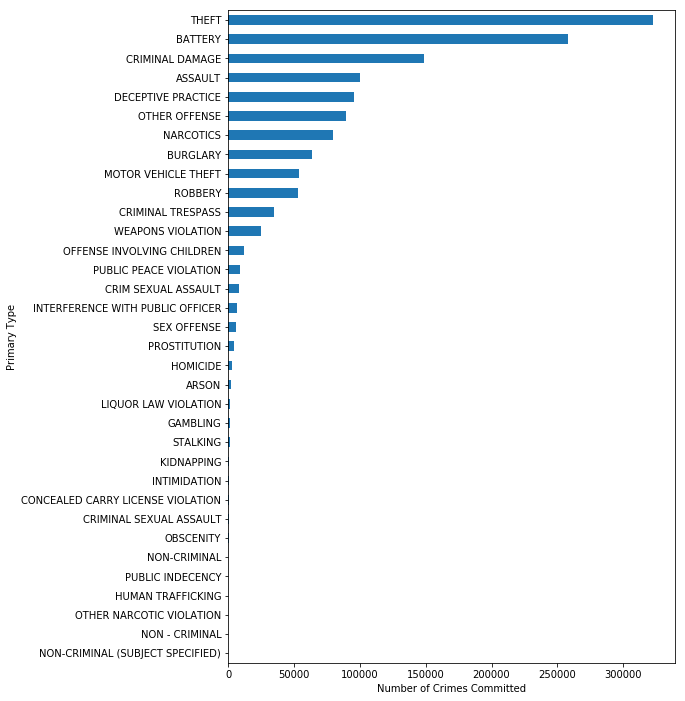

In [19]:
#the amount of each type of crime 
plt.figure(figsize = (8,12))
data.groupby(data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()




In [20]:
Crime_Data = data.dropna(axis = 0, how = 'any')

In [21]:
#make color by Description column
Groups = Crime_Data.groupby(Crime_Data['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())

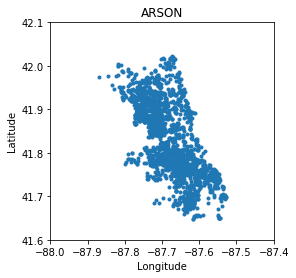

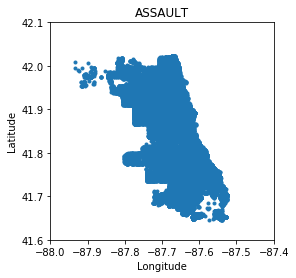

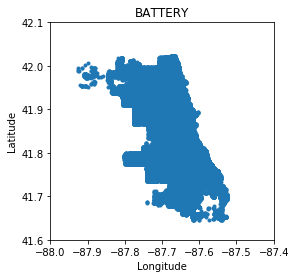

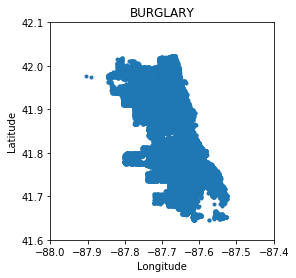

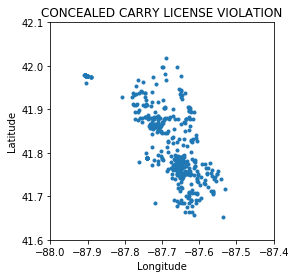

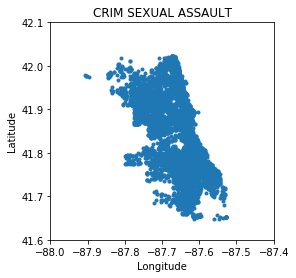

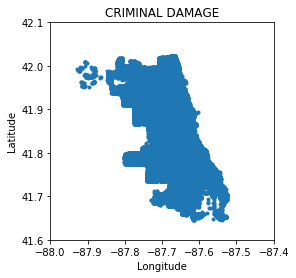

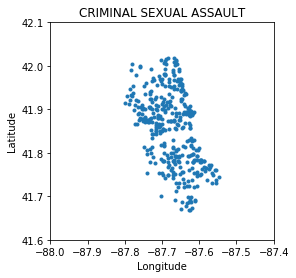

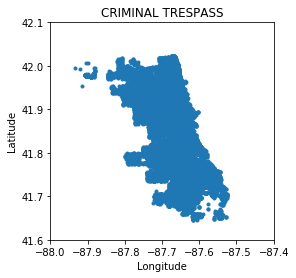

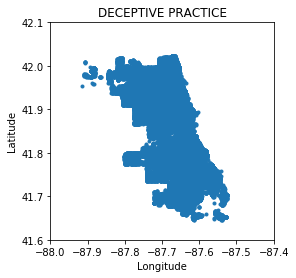

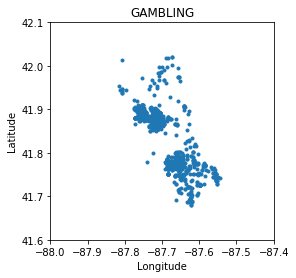

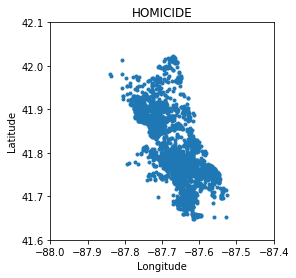

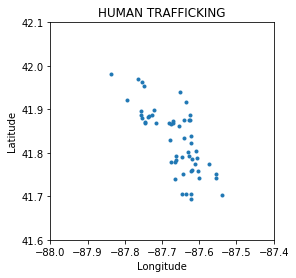

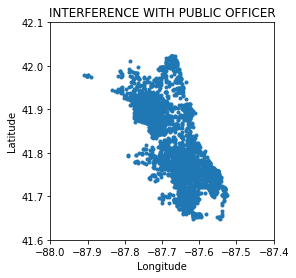

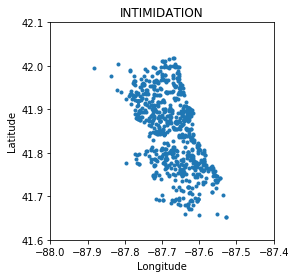

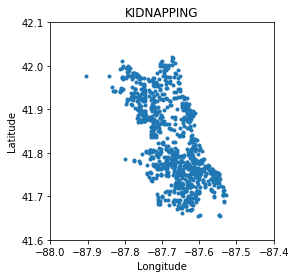

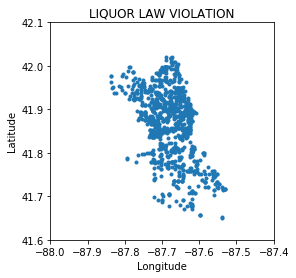

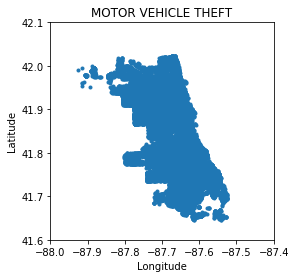

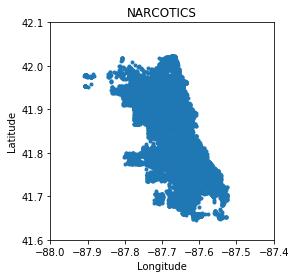

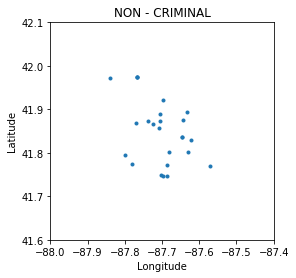

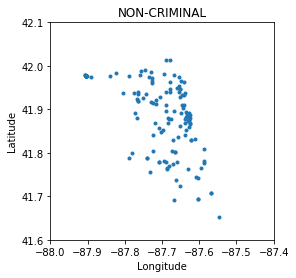

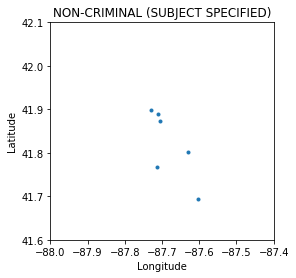

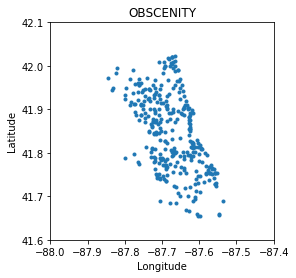

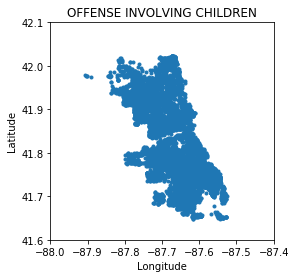

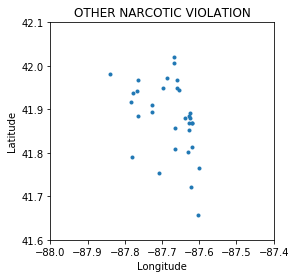

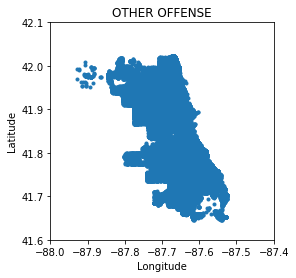

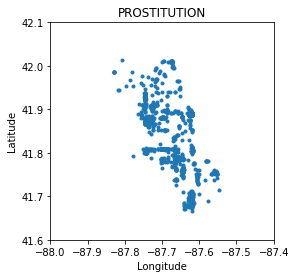

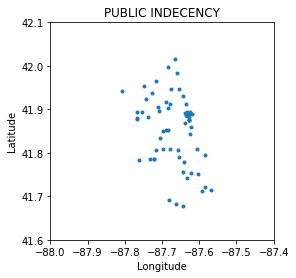

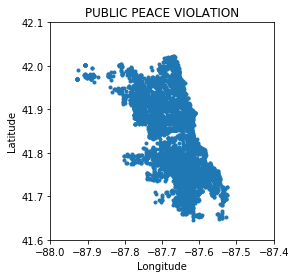

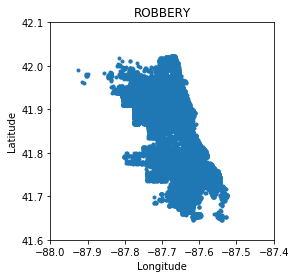

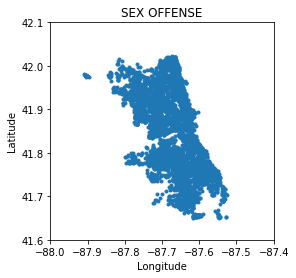

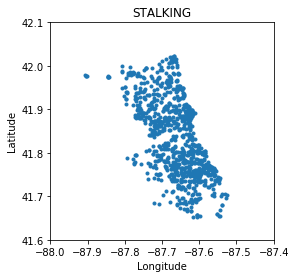

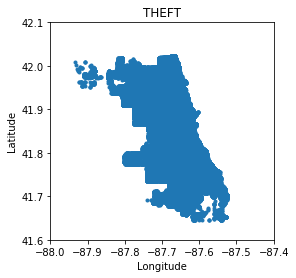

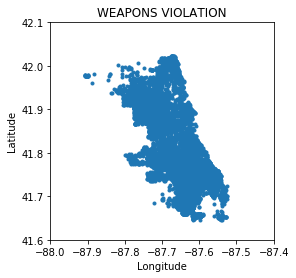

In [23]:
# the location of the crime 
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(Groups[key].Longitude, Groups[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [24]:
Crime_Data_Type = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = Crime_Data.index.date, fill_value = 0)

Text(0.5, 0, 'the total number ')

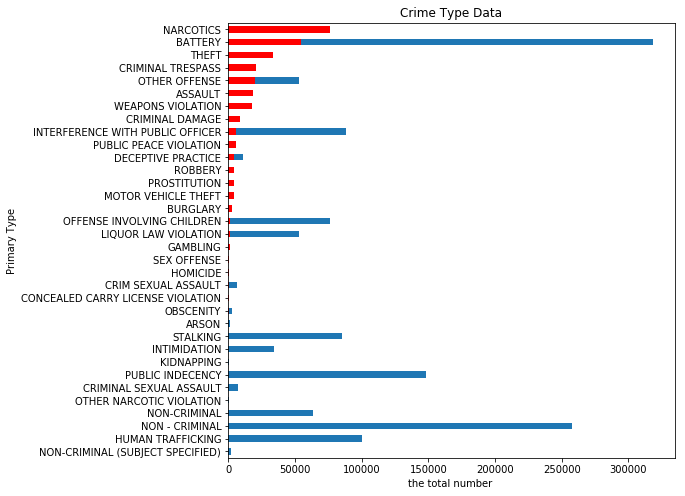

In [25]:
plt.figure(figsize = (8,8))
Crime_Data.groupby(Crime_Data['Primary Type']).size().plot(kind = 'barh')
Crime_Data_Type.sum().sort_values().plot(kind = 'barh', color = 'r')
plt.title('Crime Type Data')
plt.ylabel("Primary Type")
plt.xlabel("the total number ")

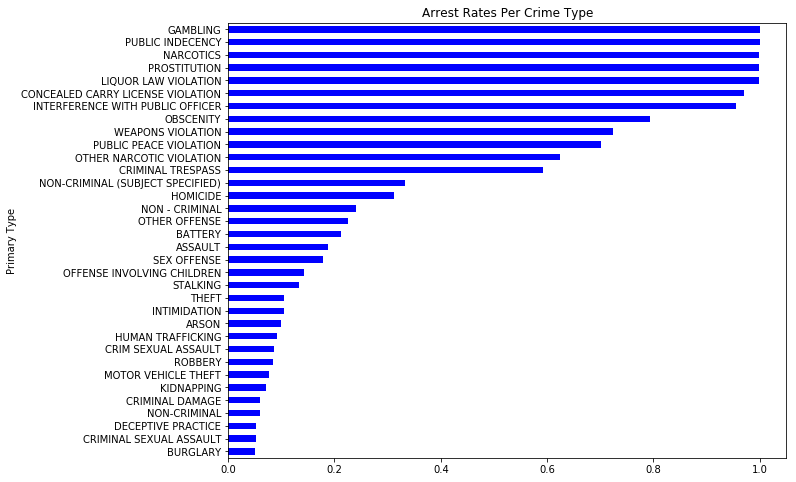

In [26]:
plt.figure(figsize = (10,8))
A_R_PT = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'b')
plt.title('Arrest Rates Per Crime Type')
plt.show()

In [29]:
A = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
mean_A = Crime_Data['Arrest'].sum() / Crime_Data.shape[0]
stderr_A = np.std(A) / (Crime_Data_Type.shape[1]) ** (1/2.0)


high_A = mean_A + 1.96 * stderr_A
low_A = mean_A - 1.96 * stderr_A
print(A)
print("Average Arrest rate is 95% between (", low_A, ",", high_A, ")")

Primary Type
ARSON                                0.100000
ASSAULT                              0.187982
BATTERY                              0.212272
BURGLARY                             0.050508
CONCEALED CARRY LICENSE VIOLATION    0.970480
CRIM SEXUAL ASSAULT                  0.087050
CRIMINAL DAMAGE                      0.060328
CRIMINAL SEXUAL ASSAULT              0.052219
CRIMINAL TRESPASS                    0.593075
DECEPTIVE PRACTICE                   0.052364
GAMBLING                             1.000000
HOMICIDE                             0.311878
HUMAN TRAFFICKING                    0.090909
INTERFERENCE WITH PUBLIC OFFICER     0.955925
INTIMIDATION                         0.104497
KIDNAPPING                           0.070907
LIQUOR LAW VIOLATION                 0.998401
MOTOR VEHICLE THEFT                  0.077623
NARCOTICS                            0.999594
NON - CRIMINAL                       0.240000
NON-CRIMINAL                         0.059259
NON-CRIMINAL (SUBJECT

In [30]:
for i in range(len(A)):
    if (A[i] <= low_A or A[i] >= high_A):
        print(A.index[i], A[i])



BURGLARY 0.050507914008977084
CONCEALED CARRY LICENSE VIOLATION 0.9704797047970479
CRIM SEXUAL ASSAULT 0.08705026276782105
CRIMINAL DAMAGE 0.06032753672125612
CRIMINAL SEXUAL ASSAULT 0.05221932114882506
CRIMINAL TRESPASS 0.5930745924109075
DECEPTIVE PRACTICE 0.05236421389450082
GAMBLING 1.0
HUMAN TRAFFICKING 0.09090909090909091
INTERFERENCE WITH PUBLIC OFFICER 0.9559254122360918
KIDNAPPING 0.07090719499478623
LIQUOR LAW VIOLATION 0.9984012789768185
MOTOR VEHICLE THEFT 0.07762266551891912
NARCOTICS 0.9995935918613493
NON-CRIMINAL 0.05925925925925926
OBSCENITY 0.7932098765432098
OTHER NARCOTIC VIOLATION 0.625
PROSTITUTION 0.9995388517408347
PUBLIC INDECENCY 1.0
PUBLIC PEACE VIOLATION 0.7006582746275551
ROBBERY 0.08353632054985932
WEAPONS VIOLATION 0.7236425614803993
